# DeepAR metrics with hyperparameters from deep_ar_hps.ipynb
Model: DeepAR

Dataset: Electricity

The same procedure as the other metrics-notebooks. We use the best hyperparameters found in deep_ar_hps.ipynb as hyperparameters to the model and look for changes in the results.

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *

In [2]:
experiment_path = "/datadrive/experiments/deep_ar/electricity"
exp = load_data(experiment_path + "/8B")

len(exp)

100

In [3]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,35.265661,93.833755,235.0,9.791667,8.031874,0.486778,0.744756,0.450049,NaN,3.483151,38.160243,0.000000,93.833749,0.791667,96.125674,1.000000
1,1.0,22.690272,102.847336,2499.0,104.125000,9.577165,0.447450,0.040888,0.040790,NaN,3.574717,81.386099,0.000000,102.847336,0.375000,82.945032,1.000000
2,2.0,0.246865,9.078655,190.0,7.916667,8.673073,0.043615,0.048439,0.046922,NaN,0.663838,11.638396,0.000000,9.078655,0.833333,15.997668,1.000000
3,3.0,1456.936035,669.135742,10468.0,436.166667,48.398763,0.576061,0.063990,0.067558,NaN,6.201107,327.762604,0.000000,669.135773,0.166667,335.792798,0.791667
4,4.0,115.585124,184.094849,4087.0,170.291667,25.383302,0.302192,0.043696,0.044734,NaN,2.700191,120.898088,0.000000,184.094849,0.416667,122.326608,0.875000
5,5.0,1703.357096,757.441162,15654.0,652.250000,77.445100,0.407515,0.044732,0.045595,NaN,3.162329,379.026050,0.000000,757.441132,0.458333,379.938239,0.875000
6,6.0,2.755949,32.334572,359.0,14.958333,4.801951,0.280568,0.094966,0.100426,NaN,2.237551,27.836536,0.000000,32.334572,0.291667,23.737583,1.000000
7,7.0,5008.884440,1257.325439,22464.0,936.000000,90.294910,0.580194,0.056868,0.057137,NaN,6.134277,731.405225,0.083333,1257.325378,0.416667,547.212927,0.916667
8,8.0,2193.431315,571.053894,4315.0,179.791667,39.300618,0.605434,0.103160,0.118112,NaN,13.222209,181.622267,0.041667,571.053879,0.541667,596.136836,0.791667


# Average error over all timeseries. Best and worst 10 repetitions

In [4]:
report_experiment_results(exp, ["MAPE"])

MAPE SCORES
	All seeds:
		Mean: 0.09985652889008924
		Std: 0.011357091509529647
		Variance: 0.106569655669565

	Worst seeds:
		Mean: 0.11988906562328339
		Std: 0.027829252183437347
		Variance: 0.16682101786136627

	Best seeds:
		Mean: 0.09292908012866974
		Std: 0.0005339315393939614
		Variance: 0.023106958717107773




# The best and worst metric-value for all timeseries. Which repetitions are most common?

In [5]:
metric = ["MAPE"]
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

In [6]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,35.265661,93.833755,235.0,9.791667,8.031874,0.486778,0.744756,0.450049,NaN,3.483151,38.160243,0.000000,93.833749,0.791667,96.125674,1.000000
321,0.0,90.944784,153.695129,264.0,11.000000,8.026991,0.797804,0.947302,0.727089,NaN,8.543276,52.635666,0.000000,153.695137,0.333333,90.649221,0.791667
642,0.0,100.182861,136.964111,284.0,11.833333,8.025109,0.711123,0.726547,0.445574,NaN,6.229799,45.042117,0.041667,136.964114,0.458333,100.154023,0.958333
963,0.0,62.446833,170.258881,189.0,7.875000,8.024132,0.884098,1.218069,1.349017,NaN,4.112995,59.908860,0.000000,170.258865,0.083333,44.722630,0.833333
1284,0.0,16.447637,65.521133,166.0,6.916667,8.019890,0.340410,0.709317,0.434821,NaN,3.715238,33.079609,0.041667,65.521137,0.416667,35.457825,0.958333
1605,0.0,14.434935,53.187702,154.0,6.416667,8.016509,0.276449,0.549052,0.362817,NaN,2.902471,40.541445,0.041667,53.187702,0.416667,35.872110,0.958333
1926,0.0,20.594484,73.326080,207.0,8.625000,8.010442,0.381409,0.563240,0.407038,NaN,1.911220,24.673741,0.125000,73.326077,0.708333,37.424244,1.000000
1,1.0,22.690272,102.847336,2499.0,104.125000,9.577165,0.447450,0.040888,0.040790,NaN,3.574717,81.386099,0.000000,102.847336,0.375000,82.945032,1.000000
322,1.0,16.339394,86.874786,2351.0,97.958333,9.571517,0.378183,0.037749,0.036849,NaN,3.312281,60.229117,0.000000,86.874786,0.958333,91.947960,1.000000


(array([  1,   0,   0,   0,   2,   0,   1,   3,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   1,   0,   0,   1,   0,   0,   0,   0, 301,   0,   0,   1,
          0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   1,   0,   0,
          0,   0,   1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0]),
 array([45,  4, 58,  7, 35]))

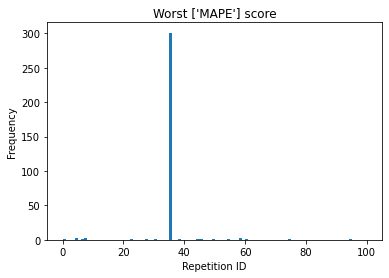

In [7]:
exp_max_bin, exp_worst_reps = find_n_most_frequent_repetitions(exp_array, 5, np.argmax)
plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=exp_max_bin)
plt.title(f"Worst {metric} score")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_max_bin, exp_worst_reps

(array([ 5,  0,  1,  3,  3,  1,  0,  6,  0,  4,  2,  3,  2,  6, 14,  4,  2,
         0,  1,  0, 18,  2,  0, 13,  1,  0,  2,  9,  3,  1,  2,  1,  3,  2,
         3,  0,  5,  0,  3,  3,  2,  0, 16,  1,  1,  2,  0,  5,  1,  1,  1,
         2,  0,  2, 12, 16,  3,  4,  2,  0,  1,  0,  2,  0,  1,  0,  6,  0,
         2,  1,  2,  6,  1,  1,  5,  0,  1,  3,  0,  1,  2,  0,  3,  2,  0,
        14,  0,  0,  4,  2,  2,  0,  4,  6,  1, 27, 11,  3,  3,  5]),
 array([14, 55, 42, 20, 95]))

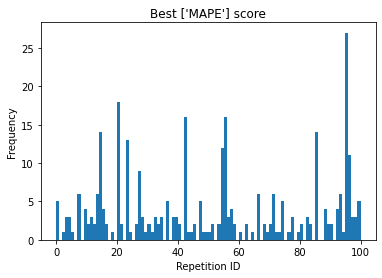

In [8]:
exp_min_bin, exp_best_reps = find_n_most_frequent_repetitions(exp_array, 5, np.argmin)
plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=exp_min_bin)
plt.title(f"Best {metric} score")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_min_bin, exp_best_reps

# The N best and N worst metric-values for all timeseries. Which repetitions are most common?

In [9]:
top_n = 10

(array([  5.,  59.,   8.,  68.,  87.,   0.,   8., 166.,  11.,  49.,   1.,
         21.,  22.,   2.,   4.,   2.,  52.,   4.,   1.,   3.,  18.,  16.,
         11.,   3.,  26.,  33., 215.,  33.,  10., 175.,  12., 225.,   2.,
          4.,  10., 307.,   2.,   3.,  11.,  10.,   8.,   1.,   3.,   0.,
         16.,  13.,  10.,   5.,  20.,   1.,  13.,   7.,  41.,  28.,   2.,
         13.,  12.,   2.,  22.,  18.,  10.,  15.,   2.,   6., 115.,   3.,
         14.,  14.,  26.,  30.,  13.,   8.,   5.,   4.,   9.,  57., 210.,
         47.,   2.,   5.,  32.,  16.,   1.,   3., 261.,  27.,   4.,  13.,
          4.,   3.,  25.,  23.,   3.,   4.,  24.,  41.,   4., 185.,   3.,
          5.]),
 array([35, 84, 31, 26, 76, 97, 29,  7, 64,  4]),
 array([307., 261., 225., 215., 210., 185., 175., 166., 115.,  87.]))

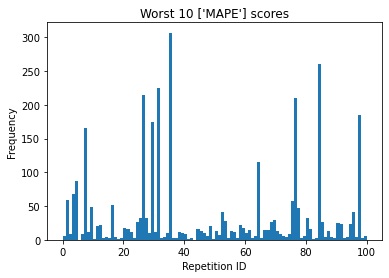

In [10]:
indexes_worst, exp_10_worst = np.unique(np.argsort(exp_array, axis=0)[-top_n:], return_counts=True)
exp_10_worst_count = count_repetitions_among_top_n(indexes_worst, exp_10_worst, exp_array.shape[0])
plt.title(f"Worst 10 {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=exp_10_worst_count)

exp_10_worst_count, np.argsort(exp_10_worst_count)[-10:][::-1], exp_10_worst_count[np.argsort(exp_10_worst_count)[-10:][::-1]]

(array([ 34.,  35.,  11.,   7.,  19.,  19.,  12.,  24.,  13.,  71.,  30.,
         34.,  37.,  47.,  79.,  44.,  30.,  20.,  46.,  19., 114.,  37.,
         43.,  78.,  16.,  20.,  15.,  90.,  20.,  11.,  31.,   9.,  27.,
         19.,  44.,   1.,  40.,  14.,  19.,  33.,  16.,  18.,  83.,  54.,
          6.,  27.,   4.,  71.,  12.,  21.,  35.,  19.,  14.,  15.,  69.,
         53.,  14.,  45.,  30.,  41.,  29.,   5.,  35.,  11.,  12.,  19.,
         49.,  15.,  47.,  15.,  15.,  53.,  51.,  16.,  35.,   5.,   6.,
         66.,  15.,  19.,  28.,   9.,  48.,  43.,   4.,  87.,  25.,  11.,
         77.,  26.,  27.,  12.,  56.,  42.,   5.,  92.,  61.,  11.,  26.,
         43.]),
 array([20, 95, 27, 85, 42, 14, 23, 88,  9, 47]),
 array([114.,  92.,  90.,  87.,  83.,  79.,  78.,  77.,  71.,  71.]))

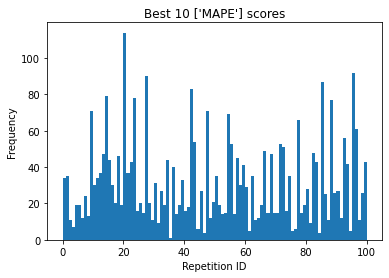

In [11]:
indexes_best, exp_10_best = np.unique(np.argsort(exp_array, axis=0)[:top_n], return_counts=True)
exp_10_best_count = count_repetitions_among_top_n(indexes_best, exp_10_best, exp_array.shape[0])
plt.title(f"Best 10 {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=exp_10_best_count)

exp_10_best_count, np.argsort(exp_10_best_count)[-10:][::-1], exp_10_best_count[np.argsort(exp_10_best_count)[-10:][::-1]]

In [28]:
def plot_smoothed_histogram(data_array, mean_array, smoothing_factor=1, plot_mape=False):
    
    def moving_average(array, n):
        ret = np.cumsum(array)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n

    best_indexes, best_counts = np.unique(np.argsort(data_array, axis=0)[:n], return_counts=True)
    worst_indexes, worst_counts = np.unique(np.argsort(data_array, axis=0)[-n:], return_counts=True)

    # Normalize the counts
    best_counts = best_counts / 321
    worst_counts = worst_counts / 321

    # Create histogram
    best_bin_counts = count_repetitions_among_top_n(best_indexes, best_counts, 100)
    worst_bin_counts = count_repetitions_among_top_n(worst_indexes, worst_counts, 100)
    bin_counts = best_bin_counts - worst_bin_counts

    # Sort by MAPE score
    sorting_idx = np.argsort(mean_array.flatten())
    sorted_bin_counts = bin_counts[sorting_idx]
    sorted_best_bin_counts = best_bin_counts[sorting_idx]
    sorted_worst_bin_counts = -worst_bin_counts[sorting_idx]

    # Smooth the values
    smoothed_best = moving_average(sorted_best_bin_counts, smoothing_factor)
    smoothed_worst = moving_average(sorted_worst_bin_counts, smoothing_factor)

    # Fill area between 0 and the smoothed values
    plt.fill_between(np.arange(smoothed_best.shape[0]), smoothed_best)
    plt.fill_between(np.arange(smoothed_worst.shape[0]), smoothed_worst)

    if plot_mape:
        plt.plot(mean_array[sorting_idx] - mean_array.mean(), color="C2")
    
    plt.ylim([-1, 1])
    plt.yticks([])
    plt.xticks([])

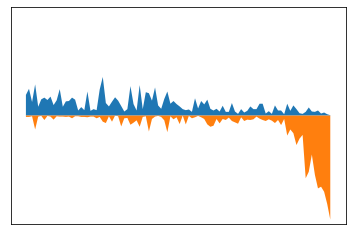

In [29]:
plot_smoothed_histogram(exp_array, exp_array.mean(axis=1))

These results are similar to the ones seen in the other notebooks, so doing a hyperparameter search helps but doesn't solve the problem completly. If we want to continue exploring this we could choose a different set of good hyperparameters from deep_ar_hps.ipynb and do the same analysis.